# Project: Wrangle and Analyze Twitter Data

## Introduction
> This document details wrangling efforts on a dataset containing 2,356 archived tweets of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. To create interesting and trustworthy analysis and visualizations, I gathered additional data from Udacity's server and Twitter API. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

## Table of Contents
#### [Data Gathering](#gather)
#### [Assessing Data](#assess)
#### [Cleaning Data](#cleaning)
#### [Storing Data](#store)
#### [Analyzing and Visualizing Data](#analyze)
#### [Insights](#insights)
#### [Visualization](#visuals)

<a id='gather'></a>

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Import libraries required for the project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [15]:
# Import module storing API keys, secrets, and Tokens
import config

In [3]:
# The location of the downloaded datafile
fileName = 'twitter-archive-enhanced.csv'
filePath = 'C:/datasets'
fullFileDir = filePath + '/' + fileName

In [4]:
# Load the downloaded datafile into a pandas dataframe
tweetArchive = pd.read_csv(fullFileDir)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
# Programatically download the image-predictions datafile
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(filePath, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [10]:
# Load image-predictions data file into a pandas datafram
secondFileName = 'image-predictions.tsv'
imagePredictions = pd.read_csv(filePath + '/' + secondFileName, sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [18]:
# Create an API Object
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
access_token = config.access_token
access_secret = config.access_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [19]:
#Create a list of all tweet IDs in the twitter-archive datafile
tweetID = list(tweetArchive.tweet_id)
len(tweetID)

2356

In [20]:
#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweetID:
        count += 1
        print(str(count) + ":" + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
Fail
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513
Success
34:885984800019947520


Success
271:841314665196081154
Success
272:841077006473256960
Success
273:840761248237133825
Success
274:840728873075638272
Success
275:840698636975636481
Success
276:840696689258311684
Success
277:840632337062862849
Success
278:840370681858686976
Success
279:840268004936019968
Success
280:839990271299457024
Success
281:839549326359670784
Success
282:839290600511926273
Success
283:839239871831150596
Success
284:838952994649550848
Success
285:838921590096166913
Success
286:838916489579200512
Success
287:838831947270979586
Success
288:838561493054533637
Success
289:838476387338051585
Success
290:838201503651401729
Success
291:838150277551247360
Success
292:838085839343206401
Success
293:838083903487373313
Success
294:837820167694528512
Success
295:837482249356513284
Success
296:837471256429613056
Success
297:837366284874571778
Fail
298:837110210464448512
Success
299:837012587749474308
Fail
300:836989968035819520
Success
301:836753516572119041
Success
302:836677758902222849
Success
303:83

Success
536:807059379405148160
Success
537:807010152071229440
Success
538:806629075125202948
Success
539:806620845233815552
Success
540:806576416489959424
Success
541:806542213899489280
Success
542:806242860592926720
Success
543:806219024703037440
Success
544:805958939288408065
Success
545:805932879469572096
Success
546:805826884734976000
Success
547:805823200554876929
Success
548:805520635690676224
Success
549:805487436403003392
Success
550:805207613751304193
Success
551:804738756058218496
Success
552:804475857670639616
Success
553:804413760345620481
Success
554:804026241225523202
Success
555:803773340896923648
Success
556:803692223237865472
Success
557:803638050916102144
Success
558:803380650405482500
Success
559:803321560782307329
Success
560:803276597545603072
Success
561:802952499103731712
Success
562:802624713319034886
Success
563:802600418706604034
Success
564:802572683846291456
Success
565:802323869084381190
Success
566:802265048156610565
Success
567:802247111496568832
Fail
568

Success
801:772615324260794368
Success
802:772581559778025472
Success
803:772193107915964416
Success
804:772152991789019136
Success
805:772117678702071809
Success
806:772114945936949249
Success
807:772102971039580160
Success
808:771908950375665664
Success
809:771770456517009408
Success
810:771500966810099713
Success
811:771380798096281600
Success
812:771171053431250945
Success
813:771136648247640064
Success
814:771102124360998913
Success
815:771014301343748096
Success
816:771004394259247104
Fail
817:770787852854652928
Success
818:770772759874076672
Success
819:770743923962707968
Fail
820:770655142660169732
Success
821:770414278348247044
Success
822:770293558247038976
Success
823:770093767776997377
Success
824:770069151037685760
Success
825:769940425801170949
Success
826:769695466921623552
Success
827:769335591808995329
Success
828:769212283578875904
Success
829:768970937022709760
Success
830:768909767477751808
Success
831:768855141948723200
Success
832:768609597686943744
Success
833:76

Rate limit reached. Sleeping for: 255


Success
902:758474966123810816
Success
903:758467244762497024
Success
904:758405701903519748
Success
905:758355060040593408
Success
906:758099635764359168
Success
907:758041019896193024
Success
908:757741869644341248
Success
909:757729163776290825
Success
910:757725642876129280
Success
911:757611664640446465
Success
912:757597904299253760
Success
913:757596066325864448
Success
914:757400162377592832
Success
915:757393109802180609
Success
916:757354760399941633
Success
917:756998049151549440
Success
918:756939218950160384
Success
919:756651752796094464
Success
920:756526248105566208
Success
921:756303284449767430
Success
922:756288534030475264
Success
923:756275833623502848
Success
924:755955933503782912
Success
925:755206590534418437
Success
926:755110668769038337
Success
927:754874841593970688
Success
928:754856583969079297
Success
929:754747087846248448
Success
930:754482103782404096
Success
931:754449512966619136
Success
932:754120377874386944
Success
933:754011816964026368
Fail
934

Success
1162:723912936180330496
Success
1163:723688335806480385
Success
1164:723673163800948736
Success
1165:723179728551723008
Success
1166:722974582966214656
Success
1167:722613351520608256
Success
1168:721503162398597120
Success
1169:721001180231503872
Success
1170:720785406564900865
Success
1171:720775346191278080
Success
1172:720415127506415616
Success
1173:720389942216527872
Success
1174:720340705894408192
Success
1175:720059472081784833
Success
1176:720043174954147842
Success
1177:719991154352222208
Success
1178:719704490224398336
Success
1179:719551379208073216
Success
1180:719367763014393856
Success
1181:719339463458033665
Success
1182:719332531645071360
Success
1183:718971898235854848
Success
1184:718939241951195136
Success
1185:718631497683582976
Success
1186:718613305783398402
Success
1187:718540630683709445
Success
1188:718460005985447936
Success
1189:718454725339934721
Success
1190:718246886998687744
Success
1191:718234618122661888
Success
1192:717841801130979328
Success


Success
1419:698355670425473025
Success
1420:698342080612007937
Success
1421:698262614669991936
Success
1422:698195409219559425
Success
1423:698178924120031232
Success
1424:697995514407682048
Success
1425:697990423684476929
Success
1426:697943111201378304
Success
1427:697881462549430272
Success
1428:697630435728322560
Success
1429:697616773278015490
Success
1430:697596423848730625
Success
1431:697575480820686848
Success
1432:697516214579523584
Success
1433:697482927769255936
Success
1434:697463031882764288
Success
1435:697270446429966336
Success
1436:697259378236399616
Success
1437:697255105972801536
Success
1438:697242256848379904
Success
1439:696900204696625153
Success
1440:696894894812565505
Success
1441:696886256886657024
Success
1442:696877980375769088
Success
1443:696754882863349760
Success
1444:696744641916489729
Success
1445:696713835009417216
Success
1446:696518437233913856
Success
1447:696490539101908992
Success
1448:696488710901260288
Success
1449:696405997980676096
Success


Success
1676:682242692827447297
Success
1677:682088079302213632
Success
1678:682059653698686977
Success
1679:682047327939461121
Success
1680:682032003584274432
Success
1681:682003177596559360
Success
1682:681981167097122816
Success
1683:681891461017812993
Success
1684:681694085539872773
Success
1685:681679526984871937
Success
1686:681654059175129088
Success
1687:681610798867845120
Success
1688:681579835668455424
Success
1689:681523177663676416
Success
1690:681340665377193984
Success
1691:681339448655802368
Success
1692:681320187870711809
Success
1693:681302363064414209
Success
1694:681297372102656000
Success
1695:681281657291280384
Success
1696:681261549936340994
Success
1697:681242418453299201
Success
1698:681231109724700672
Success
1699:681193455364796417
Success
1700:680970795137544192
Success
1701:680959110691590145
Success
1702:680940246314430465
Success
1703:680934982542561280
Success
1704:680913438424612864
Success
1705:680889648562991104
Success
1706:680836378243002368
Success


Rate limit reached. Sleeping for: 243


Success
1802:676957860086095872
Success
1803:676949632774234114
Success
1804:676948236477857792
Success
1805:676946864479084545
Success
1806:676942428000112642
Success
1807:676936541936185344
Success
1808:676916996760600576
Success
1809:676897532954456065
Success
1810:676864501615042560
Success
1811:676821958043033607
Success
1812:676819651066732545
Success
1813:676811746707918848
Success
1814:676776431406465024
Success
1815:676617503762681856
Success
1816:676613908052996102
Success
1817:676606785097199616
Success
1818:676603393314578432
Success
1819:676593408224403456
Success
1820:676590572941893632
Success
1821:676588346097852417
Success
1822:676582956622721024
Success
1823:676575501977128964
Success
1824:676533798876651520
Success
1825:676496375194980353
Success
1826:676470639084101634
Success
1827:676440007570247681
Success
1828:676430933382295552
Success
1829:676263575653122048
Success
1830:676237365392908289
Success
1831:676219687039057920
Success
1832:676215927814406144
Success


Success
2059:671347597085433856
Success
2060:671186162933985280
Success
2061:671182547775299584
Success
2062:671166507850801152
Success
2063:671163268581498880
Success
2064:671159727754231808
Success
2065:671154572044468225
Success
2066:671151324042559489
Success
2067:671147085991960577
Success
2068:671141549288370177
Success
2069:671138694582165504
Success
2070:671134062904504320
Success
2071:671122204919246848
Success
2072:671115716440031232
Success
2073:671109016219725825
Success
2074:670995969505435648
Success
2075:670842764863651840
Success
2076:670840546554966016
Success
2077:670838202509447168
Success
2078:670833812859932673
Success
2079:670832455012716544
Success
2080:670826280409919488
Success
2081:670823764196741120
Success
2082:670822709593571328
Success
2083:670815497391357952
Success
2084:670811965569282048
Success
2085:670807719151067136
Success
2086:670804601705242624
Success
2087:670803562457407488
Success
2088:670797304698376195
Success
2089:670792680469889025
Success


Success
2316:666691418707132416
Success
2317:666649482315059201
Success
2318:666644823164719104
Success
2319:666454714377183233
Success
2320:666447344410484738
Success
2321:666437273139982337
Success
2322:666435652385423360
Success
2323:666430724426358785
Success
2324:666428276349472768
Success
2325:666421158376562688
Success
2326:666418789513326592
Success
2327:666411507551481857
Success
2328:666407126856765440
Success
2329:666396247373291520
Success
2330:666373753744588802
Success
2331:666362758909284353
Success
2332:666353288456101888
Success
2333:666345417576210432
Success
2334:666337882303524864
Success
2335:666293911632134144
Success
2336:666287406224695296
Success
2337:666273097616637952
Success
2338:666268910803644416
Success
2339:666104133288665088
Success
2340:666102155909144576
Success
2341:666099513787052032
Success
2342:666094000022159362
Success
2343:666082916733198337
Success
2344:666073100786774016
Success
2345:666071193221509120
Success
2346:666063827256086533
Success


In [21]:
df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        df_list.append({'tweet_id': tweet_id, 
                        'retweet_count': retweet_count, 
                        'favorite_count': favorite_count})

twitterApi = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

<a id='assess'></a>

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visual Assessment

In [23]:
# Display the tweetArchive table
tweetArchive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [24]:
# Display the image predictions table
imagePredictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [26]:
# Display Twitter API table
twitterApi

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6982,33742
1,892177421306343426,5284,29270
2,891815181378084864,3469,21998
3,891689557279858688,7205,36852
4,891327558926688256,7730,35233
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


#### Programmatic Assessment

In [5]:
#Assess Tweet Archive table
tweetArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
# Inspect the unique values in name column
dict(tweetArchive.name.value_counts())
# Check for random words in name column
invalidNames = tweetArchive[tweetArchive.name.str.islower()]
invalidNames.name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [29]:
# Inspect the unique values in doggo column
tweetArchive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
# Inspect the unique values in floofer column
tweetArchive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [31]:
# Inspect the unique values in pupper column
tweetArchive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [32]:
# Inspect the unique values in puppo column
tweetArchive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [33]:
# A peak of observations with values in retweeted_status_id column
tweetArchive[tweetArchive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [34]:
# A peak at observations with values in the in_reply_to_status_id column
tweetArchive[tweetArchive['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [35]:
# Generate descriptive stats for numerical columns in the Tweet Archive table
tweetArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [36]:
tweetArchive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [37]:
tweetArchive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [38]:
tweetArchive[tweetArchive['rating_numerator'] >= 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [39]:
tweetArchive[tweetArchive['rating_denominator'] >= 50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


In [40]:
# Check for duplicate records in the table
tweetArchive.duplicated().sum()

0

In [41]:
# Assess image predictions table
imagePredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [42]:
# Evaluate descriptive stats for numerical data
imagePredictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [43]:
# Check for duplicates
imagePredictions.duplicated().sum()

0

In [44]:
#Check for null values
imagePredictions.isnull().sum().sum()

0

In [45]:
#Assess twitterApi table
twitterApi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [46]:
# Evaluate descriptive stats for Twitter API data
twitterApi.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2464.001719,7037.871079
std,6.820795e+16,4172.236264,10937.489044
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1221.000000
50%,7.178418e+17,1148.000000,3043.000000
75%,7.986547e+17,2851.000000,8580.000000
max,8.924206e+17,70494.000000,144523.000000


In [47]:
twitterApi[twitterApi['retweet_count'] == twitterApi.retweet_count.min()]

,tweet_id,retweet_count,favorite_count
277,838085839343206401,1,134


In [48]:
twitterApi[twitterApi['favorite_count'] == twitterApi.favorite_count.min()]

,tweet_id,retweet_count,favorite_count
31,886054160059072513,93,0
35,885311592912609280,15397,0
67,879130579576475649,5723,0
72,878404777348136964,1075,0
73,878316110768087041,5515,0
...,...,...,...
995,746521445350707200,900,0
1015,743835915802583040,1866,0
1214,711998809858043904,122,0
2230,667550904950915073,28,0


In [49]:
twitterApi.duplicated().sum()

0

In [50]:
# Check for duplicate columns
allColumns = pd.Series(list(tweetArchive) + list(imagePredictions) + list(twitterApi))
allColumns[allColumns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues
1. **Missing Records:** `tweetArchive` has 2356 rows, `imagePredictions` has 2075 rows, and `twitterApi` has 2327 rows

2. **Non-original Ratings:** `tweetArchive` (181 Retweets and 180 ratings without image), `twitterApi` (160 Retweets), and `imagePredictions` (81 Retweets)

3. **Erroneous data type:** timestamp and retweeted_status_timestamp as object, ID fields (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) as ints, rating_numerator and rating_denominator as ints

4. **tweetArchive table:** Invalid representation of null as 'None' (name, doggo, floofer, pupper, and puppo columns), and dog names as ('a', 'the', 'such')

5. **tweetArchive table:** Inaccurate rating_numerator (decimal points mistaken as whole numbers)

6. **tweetArchive table:** Missing values (name, doggo, floofer, pupper, and puppo columns, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

7. **imagePredictions table:** Sometimes capitalized p values and other times lower case

8. **imagePredictions table:** Invalid image prediction values: not a valid dog breed

9. **imagePredictions:** Multiple image prediction observations.

### Tidiness issues
1. Tweet observations stored in multiple tables.

2. **tweetArchive table:** Column headers are values, not variable names (doggo, floofer, pupper, and puppo columns)

<a id='cleaning'></a>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [156]:
# Make copies of original pieces of data
tweetArchiveClean = tweetArchive.copy()
imagePredictClean = imagePredictions.copy()
twitterApiClean = twitterApi.copy()

### Issue #1: Completeness

#### Define: Drop rows that are retweets from tweetArchive, imagePrediction and twitter API. Missing records due to no image predictions would be handled during merge.

#### Code

In [157]:
# Create a function to extract tweet ids 
def extract_id(xid, yid):
    # Create an empty lists to store tweet ids that are extracted
    tweet_list = []
    # Use zip() to iterate through both tweet id lists simultaneously
    for x, y in zip(xid, yid):
        if y not in xid:
            # Append the tweet ids to the retweetImage list
            tweet_list.append(y)
            #print(len(tweet_list))
    return tweet_list

Step 1: Drop retweets from all DataFrames

In [162]:
# Get the index of retweets in tweetArchive
rwt_index = tweetArchiveClean[tweetArchiveClean.retweeted_status_id.notnull()].index

# Drop retweets from tweetArchive on their index
tweetArchiveClean.drop(index=rwt_index, inplace=True)

In [155]:
# Use extract_id function to get ids of tweets with no image
twtID = list(tweetArchiveClean.tweet_id)
imgID = list(imagePredictClean.tweet_id)
print(len(extract_id(imgID, twtID)))
noTwtImage = extract_id(imgID, twtID)

180


In [143]:
# Use extract_id function to get ids of retweets in imagePredictions
twtID = list(tweetArchiveClean.tweet_id)
imgID = list(imagePredictClean.tweet_id)
print(len(extract_id(twtID, imgID)))
retweetImage = extract_id(twtID, imgID)

81


In [163]:
# Get index of retweets in imagePredictions
predictRetweetIndex = imagePredictClean.query(f'tweet_id in {retweetImage}').index

# Drop retweets from tweetArchive on their index
imagePredictClean.drop(index=predictRetweetIndex, inplace=True)

In [166]:
# Get the row index of retweets in twitterApi
api_index = twitterApiClean.index[twitterApiClean['favorite_count'] == twitterApiClean.favorite_count.min()]

# Drop retweets from twitterApi on their index
twitterApiClean.drop(index=api_index, inplace=True)

In [167]:
tweetArchiveClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [168]:
twitterApiClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2167 non-null   int64
 1   retweet_count   2167 non-null   int64
 2   favorite_count  2167 non-null   int64
dtypes: int64(3)
memory usage: 67.7 KB


In [169]:
imagePredictClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1994 non-null   int64  
 1   jpg_url   1994 non-null   object 
 2   img_num   1994 non-null   int64  
 3   p1        1994 non-null   object 
 4   p1_conf   1994 non-null   float64
 5   p1_dog    1994 non-null   bool   
 6   p2        1994 non-null   object 
 7   p2_conf   1994 non-null   float64
 8   p2_dog    1994 non-null   bool   
 9   p3        1994 non-null   object 
 10  p3_conf   1994 non-null   float64
 11  p3_dog    1994 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 161.6+ KB


Step 2: Drop tweets that have no images in tweetArchive and twitterApi

In [175]:
len(noTwtImage)

180

In [176]:
# Get index of tweets without image
drop_index_img = tweetArchiveClean.query(f'tweet_id in {noTwtImage}').index
api_index_img = twitterApiClean.query(f'tweet_id in {noTwtImage}').index
print(len(drop_index_img))
print(len(api_index_img))

180
180


In [177]:
# Drop tweets without image
tweetArchiveClean.drop(index=drop_index_img, inplace=True)
twitterApiClean.drop(index=api_index_img, inplace=True)

In [180]:
# Drop tweet without image missed in the operation above
drop_index_img = tweetArchiveClean.query(f'tweet_id == 667070482143944705').index
api_index_img = twitterApiClean.query(f'tweet_id == 667070482143944705').index
print(len(drop_index_img))
print(len(api_index_img))

1
1


In [181]:
# Drop tweet without image
tweetArchiveClean.drop(index=drop_index_img, inplace=True)
twitterApiClean.drop(index=api_index_img, inplace=True)

In [182]:
print(tweetArchiveClean.shape)
print(twitterApiClean.shape)
imagePredictClean.shape

(1994, 17)
(1986, 3)


(1994, 12)

In [185]:
# Get index of deleted tweets
arID = list(tweetArchiveClean.tweet_id)
apID =list(twitterApiClean.tweet_id)
deletedTweet = extract_id(apID, arID)
del_arc_ind = tweetArchiveClean.query(f'tweet_id in {deletedTweet}').index
del_img_ind = imagePredictClean.query(f'tweet_id in {deletedTweet}').index

# Drop rows with deleted tweets
tweetArchiveClean.drop(index=del_arc_ind, inplace=True)
imagePredictClean.drop(index=del_img_ind, inplace=True)

#### Test

In [186]:
tweetArchiveClean[tweetArchiveClean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [187]:
imagePredictClean.query(f'tweet_id in {retweetImage}')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [188]:
# Check if zero remains the minimum favorite count
twitterApiClean[twitterApiClean['favorite_count'] == twitterApiClean.favorite_count.min()]

,tweet_id,retweet_count,favorite_count
2310,666102155909144576,11,66


In [189]:
tweetArchiveClean.query(f'tweet_id in {xtraTweet}')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [190]:
tweetArchiveClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1986 non-null   object 
 10  rating_numerator            1986 non-null   int64  
 11  rating_denominator          1986 non-null   int64  
 12  name                        1986 non-null   object 
 13  doggo                       1986 

In [191]:
twitterApiClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1986 non-null   int64
 1   retweet_count   1986 non-null   int64
 2   favorite_count  1986 non-null   int64
dtypes: int64(3)
memory usage: 62.1 KB


In [192]:
imagePredictClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1986 non-null   int64  
 1   jpg_url   1986 non-null   object 
 2   img_num   1986 non-null   int64  
 3   p1        1986 non-null   object 
 4   p1_conf   1986 non-null   float64
 5   p1_dog    1986 non-null   bool   
 6   p2        1986 non-null   object 
 7   p2_conf   1986 non-null   float64
 8   p2_dog    1986 non-null   bool   
 9   p3        1986 non-null   object 
 10  p3_conf   1986 non-null   float64
 11  p3_dog    1986 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 161.0+ KB


### Issue #2: Tidiness

#### Define: Merge tweetArchive, imagePredictions and twitterApi tables on `tweet_id`.

#### Code

In [193]:
# Merge tweet Archive and twitter API data into one dataset
dogRatingsMerged = tweetArchiveClean.merge(twitterApiClean, how='inner', on='tweet_id')

In [195]:
# Merge the new dataset with image predictions to form one master dataframe
dogRatingsMerged = dogRatingsMerged.merge(imagePredictClean, how='inner', on='tweet_id') 

#### Test

In [197]:
# Confirm code worked
dogRatingsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1986 non-null   object 
 10  rating_numerator            1986 non-null   int64  
 11  rating_denominator          1986 non-null   int64  
 12  name                        1986 non-null   object 
 13  doggo                       1986 

#### Define: Merge doggo, floofer, pupper, and puppo columns into a dog_stage column. Replace None with NaN in all 4 columns.

#### Code

In [198]:
# Create a function to drop columns that are not needed in the dataset

def drop_column(a):
    '''
    a = takes a string input that will be used for column groupings
    '''
    for col in dogRatingsMerged.columns:
        if a in col:
            dogRatingsMerged.drop(columns=[col], inplace=True)

In [199]:
# Handle None in each column
dogRatingsMerged.doggo.replace('None', '', inplace=True)
dogRatingsMerged.floofer.replace('None', '', inplace=True)
dogRatingsMerged.pupper.replace('None', '', inplace=True)
dogRatingsMerged.puppo.replace('None', '', inplace=True)

In [200]:
# Merge all columns into one
dogRatingsMerged['dog_stage'] = dogRatingsMerged.doggo + dogRatingsMerged.floofer + dogRatingsMerged.pupper + dogRatingsMerged.puppo

In [201]:
# Handle rows with multiple dog stages
dogRatingsMerged.dog_stage.replace('doggopupper', 'multiple', inplace=True)
dogRatingsMerged.dog_stage.replace('doggopuppo', 'multiple', inplace=True)
dogRatingsMerged.dog_stage.replace('doggofloofer', 'multiple', inplace=True)

In [202]:
# Handle rows with missing values
dogRatingsMerged.loc[dogRatingsMerged.dog_stage == '', 'dog_stage'] = np.nan

In [203]:
#Drop all old columns
drop_column('doggo')
drop_column('floofer')
drop_column('pupper')
drop_column('puppo')

#### Test

In [204]:
dogRatingsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1986 non-null   object 
 10  rating_numerator            1986 non-null   int64  
 11  rating_denominator          1986 non-null   int64  
 12  name                        1986 non-null   object 
 13  retweet_count               1986 

In [205]:
dogRatingsMerged.dog_stage.value_counts()

pupper      203
doggo        62
puppo        22
multiple     11
floofer       7
Name: dog_stage, dtype: int64

### Issue 3: Quality

#### Define: Extract ratings value correctly: Use regex to get ratings value from text column.

#### Code

In [206]:
# Extract ratings from text column into a new dataframe
correctRatings = dogRatingsMerged['text'].str.extract('(\d+\.?\d*?)/(\d+)', expand=True)
correctRatings.columns = ['rating_numerator', 'rating_denominator']

In [207]:
#Drop old rating_numerator and rating_denominator columns
dogRatingsMerged.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

In [208]:
# Join the new rating columns with the master dataset using row index
dogRatingsMerged = dogRatingsMerged.join(correctRatings)

#### Test

In [209]:
dogRatingsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1986 non-null   object 
 10  name                        1986 non-null   object 
 11  retweet_count               1986 non-null   int64  
 12  favorite_count              1986 non-null   int64  
 13  jpg_url                     1986 

#### Define: Drop multiple image predictions. Retain image predictions with highest confidence interval.

#### Code

In [210]:
# Rename p1 and p1_dog
dogRatingsMerged.rename(columns={'p1':'dog_breed', 'p1_dog':'dog_breed_checker'}, inplace=True)

In [211]:
#Drop all other image prediction values
drop_column('p1')
drop_column('p2')
drop_column('p3')

#### Test

In [212]:
dogRatingsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1986 non-null   object 
 10  name                        1986 non-null   object 
 11  retweet_count               1986 non-null   int64  
 12  favorite_count              1986 non-null   int64  
 13  jpg_url                     1986 

#### Define: Drop columns with only NaN values: columns associated with posts that are retweets.

#### Code

In [213]:
dogRatingsMerged.dropna(axis=1, how='all', inplace=True)

#### Test

In [214]:
dogRatingsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1986 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1986 non-null   object 
 4   source                 1986 non-null   object 
 5   text                   1986 non-null   object 
 6   expanded_urls          1986 non-null   object 
 7   name                   1986 non-null   object 
 8   retweet_count          1986 non-null   int64  
 9   favorite_count         1986 non-null   int64  
 10  jpg_url                1986 non-null   object 
 11  img_num                1986 non-null   int64  
 12  dog_breed              1986 non-null   object 
 13  dog_breed_checker      1986 non-null   bool   
 14  dog_stage              305 non-null    object 
 15  rati

#### Define: Convert timestamp from object to datetime. Convert ratings to floats. Convert ID fields to object.

#### Code

In [215]:
# Convert timestamp from object to datetime
dogRatingsMerged.timestamp = pd.to_datetime(dogRatingsMerged.timestamp)
# Convert ratings from object to float
dogRatingsMerged.rating_numerator = dogRatingsMerged.rating_numerator.astype(float)
dogRatingsMerged.rating_denominator = dogRatingsMerged.rating_denominator.astype(float)
# Convert ID fields from int and float to object
dogRatingsMerged.tweet_id = dogRatingsMerged.tweet_id.astype(str)
dogRatingsMerged.in_reply_to_status_id = dogRatingsMerged.in_reply_to_status_id.astype(str)
dogRatingsMerged.in_reply_to_user_id = dogRatingsMerged.in_reply_to_user_id.astype(str)

#### Test

In [216]:
dogRatingsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1986 non-null   object             
 1   in_reply_to_status_id  1986 non-null   object             
 2   in_reply_to_user_id    1986 non-null   object             
 3   timestamp              1986 non-null   datetime64[ns, UTC]
 4   source                 1986 non-null   object             
 5   text                   1986 non-null   object             
 6   expanded_urls          1986 non-null   object             
 7   name                   1986 non-null   object             
 8   retweet_count          1986 non-null   int64              
 9   favorite_count         1986 non-null   int64              
 10  jpg_url                1986 non-null   object             
 11  img_num                1986 non-null   int64            

#### Define: Drop rows with FALSE image predictions.

#### Code

In [217]:
# Filter dataset for rows with False dog predictions and pass the row indexes into a variable
dropIndex = dogRatingsMerged.query('dog_breed_checker == False').index
# Drop rows on index
dogRatingsMerged.drop(index=dropIndex, inplace=True)

#### Test

In [218]:
dogRatingsMerged.query('dog_breed_checker == False')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,dog_breed,dog_breed_checker,dog_stage,rating_numerator,rating_denominator


In [219]:
dogRatingsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 1 to 1985
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1469 non-null   object             
 1   in_reply_to_status_id  1469 non-null   object             
 2   in_reply_to_user_id    1469 non-null   object             
 3   timestamp              1469 non-null   datetime64[ns, UTC]
 4   source                 1469 non-null   object             
 5   text                   1469 non-null   object             
 6   expanded_urls          1469 non-null   object             
 7   name                   1469 non-null   object             
 8   retweet_count          1469 non-null   int64              
 9   favorite_count         1469 non-null   int64              
 10  jpg_url                1469 non-null   object             
 11  img_num                1469 non-null   int64            

#### Define: Replace rating for tweet id '716439118184652801' from 50/50 to 11/10.

#### Code

In [220]:
# Use filtering to get row index of tweet with 50/50 rating
mask = dogRatingsMerged.query('rating_numerator == 50').index

# Declare the columns with values that need to be changed
colNum = 'rating_numerator'
colDen = 'rating_denominator'
# Replace the rating numerator and denominator values
dogRatingsMerged.loc[mask, colNum] = 11
dogRatingsMerged.loc[mask, colDen] = 10

#### Test

In [221]:
dogRatingsMerged.query('rating_numerator == 50')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,dog_breed,dog_breed_checker,dog_stage,rating_numerator,rating_denominator


#### Define: Convert dog_breed to lower case.

#### Code

In [222]:
dogRatingsMerged.dog_breed = dogRatingsMerged.dog_breed.str.lower()

#### Test

In [223]:
dogRatingsMerged.dog_breed.sample(10)

1831               malinois
1642                    pug
545                  collie
1435                 basset
1288    miniature_schnauzer
1262                    pug
41         golden_retriever
245                   boxer
1181        tibetan_terrier
1485       golden_retriever
Name: dog_breed, dtype: object

#### Define: Remove invalid dog names from name column. Replace None with NaN in name column.

#### Code

In [224]:
# Create a list of all invalid dog names
invalidName = dogRatingsMerged[dogRatingsMerged.name.str.islower()]
invalidName = dict(invalidName.name.value_counts())
invalidName = list(invalidName.keys())

In [225]:
# Get index for rows containing invalid names
nameIndex = dogRatingsMerged.query(f'name in {invalidName}').index
# Replace invalid names with None
dogRatingsMerged.loc[nameIndex, 'name'] = 'None'

In [226]:
# Convert None to NaN
dogRatingsMerged.name.replace('None', '', inplace=True)
dogRatingsMerged.loc[dogRatingsMerged.name == '', 'name'] = np.nan

#### Test

In [227]:
dogRatingsMerged.query(f'name in {invalidName}')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,dog_breed,dog_breed_checker,dog_stage,rating_numerator,rating_denominator


In [228]:
dogRatingsMerged.name.isnull().sum()

432

<a id='store'></a>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [231]:
filePath = 'C:/datasets'
fileName = 'twitter_archive_master.csv'
fullFileDir = filePath + '/' + fileName
dogRatingsMerged.to_csv(fullFileDir)

<a id='analyze'></a>

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Drop rows with ratings that are outliers.

In [232]:
dropIndex = dogRatingsMerged.query('rating_numerator >= 24').index
dogRatingsMerged.drop(index=dropIndex, inplace=True)

In [233]:
# Confirm there are no ratings above 24
dogRatingsMerged.query('rating_numerator > 24')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,dog_breed,dog_breed_checker,dog_stage,rating_numerator,rating_denominator


Extract Hour of Day from timestamp column.

In [234]:
# Create a new column to hold hour of day
dogRatingsMerged['hour_of_day'] = dogRatingsMerged['timestamp'].dt.hour

In [235]:
#Confirm the column now exists
dogRatingsMerged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,dog_breed,dog_breed_checker,dog_stage,rating_numerator,rating_denominator,hour_of_day
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,5284,29270,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,True,NaN,13.0,10.0,0
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,3469,21998,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,True,NaN,12.0,10.0,0
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,7730,35233,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,NaN,12.0,10.0,16
5,891087950875897856,nan,nan,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,2593,17767,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,True,NaN,13.0,10.0,0
6,890971913173991426,nan,nan,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,1651,10345,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,True,NaN,13.0,10.0,16


In [236]:
dogRatingsMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1985
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1458 non-null   object             
 1   in_reply_to_status_id  1458 non-null   object             
 2   in_reply_to_user_id    1458 non-null   object             
 3   timestamp              1458 non-null   datetime64[ns, UTC]
 4   source                 1458 non-null   object             
 5   text                   1458 non-null   object             
 6   expanded_urls          1458 non-null   object             
 7   name                   1036 non-null   object             
 8   retweet_count          1458 non-null   int64              
 9   favorite_count         1458 non-null   int64              
 10  jpg_url                1458 non-null   object             
 11  img_num                1458 non-null   int64            

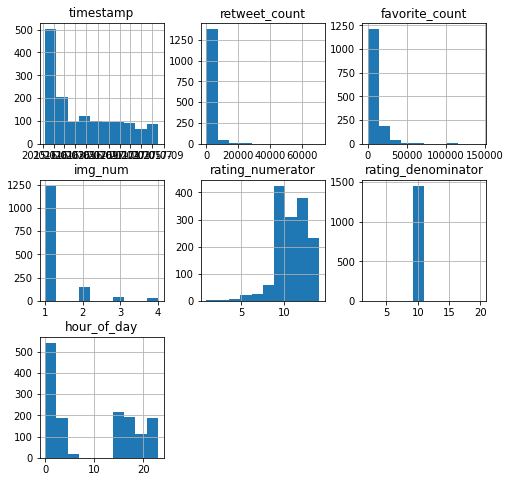

In [237]:
# Plot a histogram to get a quick look at the distribution of numerical variables.
dogRatingsMerged.hist(figsize= (8, 8));

Create a fuction to reduce chart label repitions when creating visualizations

In [238]:
def chartLabel(x,y,t):
    '''
    x = str(label on x axis)
    y = str(label on y axis)
    t = str(chart title)
    '''
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

### Do dogs with higher ratings receive more likes and retweets?

In [239]:
# Use query to select ratings grouped into high and low
medRating = dogRatingsMerged.rating_numerator.median()
lowRating = dogRatingsMerged.query(f'rating_numerator < {medRating}')
highRating = dogRatingsMerged.query(f'rating_numerator >= {medRating}')

In [240]:
# Get the mean likes for each group
meanLikesLow = lowRating.favorite_count.mean()
meanLikesHigh = highRating.favorite_count.mean()

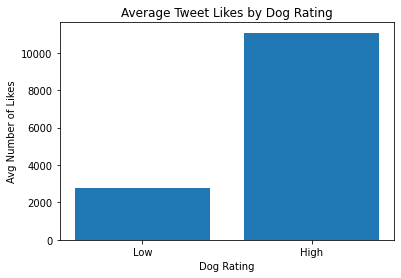

In [241]:
# Create bar chart with appropraite labels
locations = [1, 2]
heights = [meanLikesLow, meanLikesHigh]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
chartLabel('Dog Rating', 'Avg Number of Likes', 'Average Tweet Likes by Dog Rating');

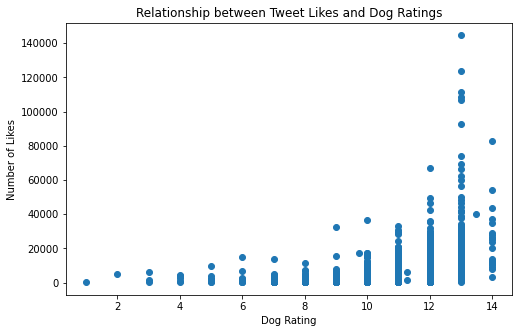

In [242]:
# Check if there's a correlation between ratings and retweets
x = dogRatingsMerged.rating_numerator
y = dogRatingsMerged.favorite_count
plt.figure(figsize = (8, 5))
plt.scatter(x,y)
chartLabel('Dog Rating', 'Number of Likes', 'Relationship between Tweet Likes and Dog Ratings');

Let's repeat the same process for retweets

In [243]:
# Get Mean Retweets for each group
meanRwtLow = lowRating.retweet_count.mean()
meanRwtHigh = highRating.retweet_count.mean()

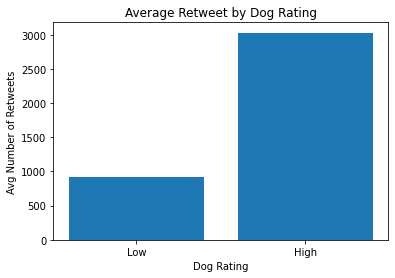

In [244]:
#Create bar chart with appropraite label 
locations = [1, 2]
heights = [meanRwtLow, meanRwtHigh]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label = labels)
chartLabel('Dog Rating', 'Avg Number of Retweets', 'Average Retweet by Dog Rating');

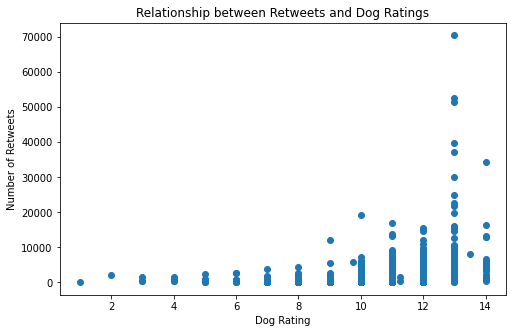

In [245]:
# Check if there's a correlation between ratings and retweetb
x = dogRatingsMerged.rating_numerator
y = dogRatingsMerged.retweet_count
plt.figure(figsize = (8, 5))
plt.scatter(x,y)
chartLabel('Dog Rating', 'Number of Retweets', 'Relationship between Retweets and Dog Ratings');

In [246]:
dogRatingsMerged.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=0).head(20)

dog_breed
saluki                     12.500000
briard                     12.333333
tibetan_mastiff            12.250000
border_terrier             12.142857
standard_schnauzer         12.000000
giant_schnauzer            12.000000
silky_terrier              12.000000
eskimo_dog                 11.777778
gordon_setter              11.750000
irish_setter               11.750000
samoyed                    11.743590
chow                       11.609756
golden_retriever           11.606618
cardigan                   11.529412
australian_terrier         11.500000
wire-haired_fox_terrier    11.500000
great_pyrenees             11.461538
kelpie                     11.454545
pembroke                   11.443182
norfolk_terrier            11.428571
Name: rating_numerator, dtype: float64

#### What's the best time to post about Dogs?

In [247]:
# Check the hour of day with the highest average likes
dogRatingsMerged.groupby('hour_of_day')['favorite_count'].mean()

hour_of_day
0     12691.186528
1      7051.509901
2      4155.421769
3      3786.747967
4      3083.328125
5      3247.066667
6     39177.000000
13      625.000000
14     5975.250000
15     9486.639344
16    12378.684211
17     8131.404959
18    10161.305556
19     7937.557377
20     7010.745098
21     5670.615385
22     6441.458333
23     8275.113636
Name: favorite_count, dtype: float64

In [248]:
# Check the hour of day with the highest average Retweets
dogRatingsMerged.groupby('hour_of_day')['retweet_count'].mean()

hour_of_day
0      3226.357513
1      1927.861386
2      1387.013605
3      1210.829268
4      1009.234375
5      1341.800000
6     17854.333333
13      325.000000
14     1533.250000
15     2652.278689
16     2969.473684
17     2128.429752
18     3743.791667
19     2542.147541
20     2278.627451
21     1617.115385
22     1596.145833
23     2285.761364
Name: retweet_count, dtype: float64

In [249]:
# Number of tweet at the top hour of day broken down by dog breed
topHour = dogRatingsMerged.query('hour_of_day == 6')
topHour.dog_breed.value_counts()

chihuahua    2
chow         1
Name: dog_breed, dtype: int64

In [250]:
# Number of tweet at the other top hour of day broken down by dog breed
otherHour = dogRatingsMerged.query('hour_of_day in [0, 16]')
# Create a dictionary to visually assess the dog breeds with the most tweets
dict(otherHour.groupby('hour_of_day')['dog_breed'].value_counts())

{(0, 'golden_retriever'): 20,
 (0, 'chihuahua'): 11,
 (0, 'labrador_retriever'): 11,
 (0, 'pembroke'): 10,
 (0, 'samoyed'): 9,
 (0, 'pomeranian'): 8,
 (0, 'malamute'): 7,
 (0, 'pug'): 7,
 (0, 'chow'): 6,
 (0, 'cardigan'): 4,
 (0, 'chesapeake_bay_retriever'): 4,
 (0, 'collie'): 4,
 (0, 'french_bulldog'): 4,
 (0, 'german_shepherd'): 4,
 (0, 'lakeland_terrier'): 4,
 (0, 'shetland_sheepdog'): 4,
 (0, 'toy_poodle'): 4,
 (0, 'bernese_mountain_dog'): 3,
 (0, 'cocker_spaniel'): 3,
 (0, 'dalmatian'): 3,
 (0, 'italian_greyhound'): 3,
 (0, 'rottweiler'): 3,
 (0, 'siberian_husky'): 3,
 (0, 'staffordshire_bullterrier'): 3,
 (0, 'basenji'): 2,
 (0, 'bull_mastiff'): 2,
 (0, 'flat-coated_retriever'): 2,
 (0, 'keeshond'): 2,
 (0, 'miniature_pinscher'): 2,
 (0, 'norfolk_terrier'): 2,
 (0, 'saluki'): 2,
 (0, 'soft-coated_wheaten_terrier'): 2,
 (0, 'vizsla'): 2,
 (0, 'west_highland_white_terrier'): 2,
 (0, 'airedale'): 1,
 (0, 'australian_terrier'): 1,
 (0, 'basset'): 1,
 (0, 'beagle'): 1,
 (0, 'black-and

#### What's the most loved dog breed?

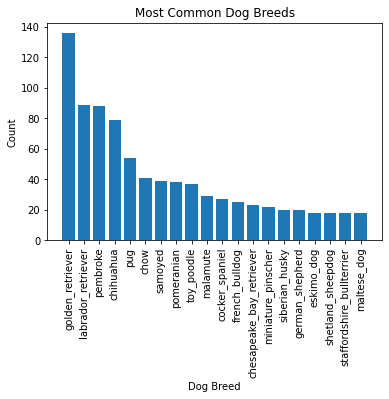

In [263]:
# Create a pie chart to visualize the dog breed with the most tweets
top_breed = dogRatingsMerged.dog_breed.value_counts().head(20)
x = top_breed.index
y = top_breed

plt.bar(x, y)
plt.xticks(rotation=90);
chartLabel('Dog Breed', 'Count', 'Most Common Dog Breeds');

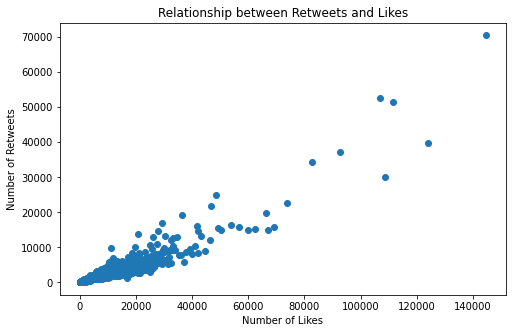

In [264]:
# Use a scatterplot to visualize the relationship between likes and retweets
x = dogRatingsMerged.favorite_count
y = dogRatingsMerged.retweet_count
plt.figure(figsize = (8, 5))
plt.scatter(x,y)
chartLabel('Number of Likes', 'Number of Retweets', 'Relationship between Retweets and Likes');

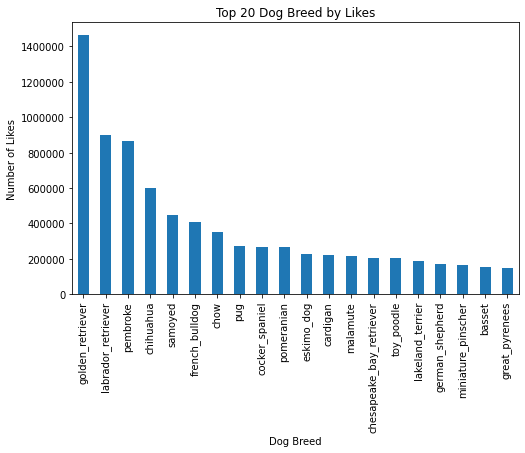

In [265]:
# Use a bar chart to check the dog breed with the most total likes
plt.ticklabel_format(style='plain')
dogRatingsMerged.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=0).head(20).plot(kind='bar', figsize=(8, 5))
chartLabel('Dog Breed', 'Number of Likes', 'Top 20 Dog Breed by Likes');

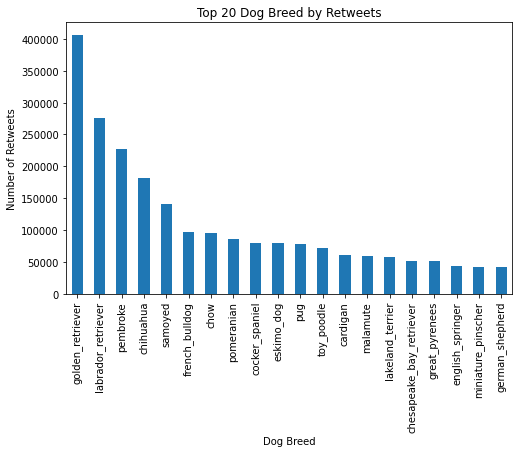

In [266]:
# Use a bar chart to check the dog breed with the most total retweets
plt.ticklabel_format(style='plain')
dogRatingsMerged.groupby('dog_breed')['retweet_count'].sum().sort_values(ascending=0).head(20).plot(kind='bar', figsize=(8, 5))
chartLabel('Dog Breed', 'Number of Retweets', 'Top 20 Dog Breed by Retweets');

In [267]:
# Check for the dog breeds receiving the least likes
dogRatingsMerged.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=0).tail(10)

dog_breed
tibetan_terrier       6220
scottish_deerhound    6201
clumber               6187
scotch_terrier        3021
ibizan_hound          2797
entlebucher           2248
brabancon_griffon     2230
standard_schnauzer    1689
groenendael           1622
japanese_spaniel      1111
Name: favorite_count, dtype: int64

**What proportion of dog breeds get the most likes?**

In [268]:
len(dogRatingsMerged.dog_breed.value_counts())

111

In [269]:
# Calculate the total of all likes received by the top 3 breeds
topThree = dogRatingsMerged.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=0).head(3).sum()
topThree

3227933

In [270]:
# Calculate the total likes received by all breeds
totalLikes = dogRatingsMerged.favorite_count.sum()
totalLikes

11688287

In [271]:
# Calculate the proportion of Likes received by the Top 3 breeds
propLikes = topThree / totalLikes
propLikes

0.2761681844396874

<a id='insights'></a>

### Insights:
1. Dog ratings do not determine likes and retweets. Dog breeds with a higher rating don't necessarily get the most likes.  

2. Dog breeds drive likes and retweets with only 3 (out of 111) breeds accounting for the largest share (28%) of all likes. 

3. The best time to post for more likes and retweets is between 2pm and 12am. However, engagement peaks at 12am and 4pm, respectively.

<a id='visuals'></a>

### Visualization

C:\Users\PLAYHOUSE\AppData\Local\Temp\ipykernel_6068\1156537306.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratingLikes = dogRatingsMerged.groupby('dog_breed')['rating_numerator','favorite_count'].mean()


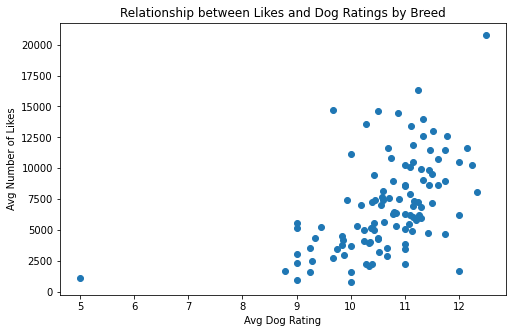

In [272]:
# Use a scatterplot to visualize the relationship between ratings and likes
ratingLikes = dogRatingsMerged.groupby('dog_breed')['rating_numerator','favorite_count'].mean()

x = ratingLikes.rating_numerator
y = ratingLikes.favorite_count
plt.figure(figsize = (8, 5))
plt.scatter(x,y)
chartLabel('Avg Dog Rating', 'Avg Number of Likes', 'Relationship between Likes and Dog Ratings by Breed');

C:\Users\PLAYHOUSE\AppData\Local\Temp\ipykernel_6068\4165558641.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  retweetLikes = dogRatingsMerged.groupby('dog_breed')['retweet_count','favorite_count'].mean()


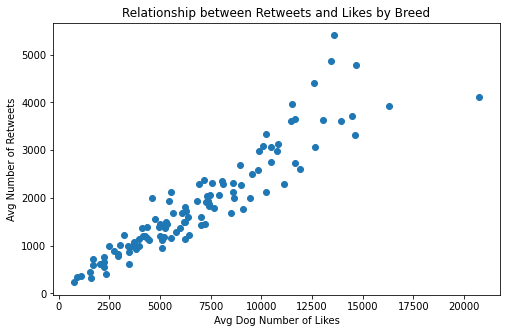

In [273]:
# Use a scatterplot to visualize the relationship between likes and retweets
retweetLikes = dogRatingsMerged.groupby('dog_breed')['retweet_count','favorite_count'].mean()

x = retweetLikes.favorite_count
y = retweetLikes.retweet_count
plt.figure(figsize = (8, 5))
plt.scatter(x,y)
chartLabel('Avg Dog Number of Likes', 'Avg Number of Retweets', 'Relationship between Retweets and Likes by Breed');

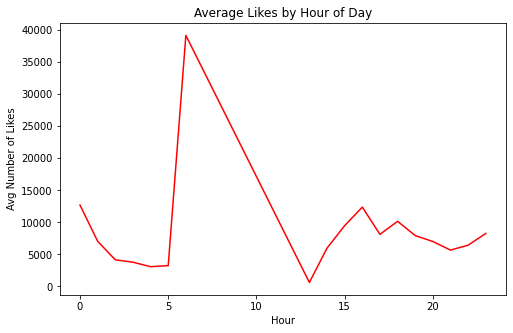

In [274]:
# Use a linegraph to visualize the best time to post to get the most likes
dogRatingsMerged.groupby('hour_of_day')['favorite_count'].mean().plot(kind='line', color='r', figsize=(8, 5))
chartLabel('Hour', 'Avg Number of Likes', 'Average Likes by Hour of Day');